In [1]:
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd

In [2]:
r = np.load('results/RF_results.npz')

[Text(0.5, 0, 'Iterations'),
 Text(0, 0.5, '-EO'),
 Text(0.5, 1.0, 'Evolution of fairness with iterations')]

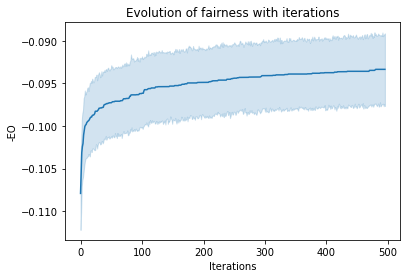

In [3]:
fig = sns.lineplot(data=pd.DataFrame(r['record']).melt(), x="variable", y="value")  # from https://github.com/mwaskom/seaborn/issues/1499
fig.set(xlabel='Iterations', ylabel='-EO', title='Evolution of fairness with iterations')

In [5]:
plt.savefig('img/RF_fairness.eps',format='eps')

<Figure size 432x288 with 0 Axes>

[Text(0.5, 0, 'Iterations'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Evolution of accuracy with iterations')]

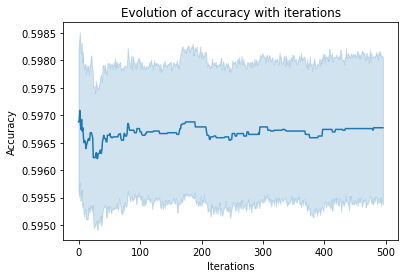

In [7]:
fig = sns.lineplot(data=pd.DataFrame(r['record_acc']).melt(), x="variable", y="value")  # from https://github.com/mwaskom/seaborn/issues/1499
fig.set(xlabel='Iterations', ylabel='Accuracy', title='Evolution of accuracy with iterations')

In [8]:
plt.savefig('img/RF_acc.eps',format='eps')

<Figure size 432x288 with 0 Axes>

[Text(0.5, 1.0, 'Accuracy/Fairness points explored during training')]

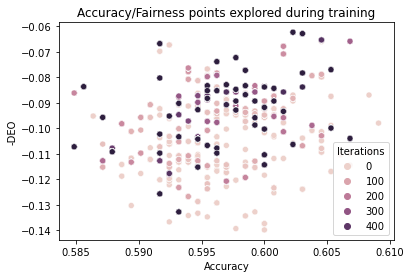

In [9]:
fair_df = pd.DataFrame(r['record']).melt(value_name='-DEO', var_name='Iterations')
acc_df = pd.DataFrame(r['record_acc']).melt(value_name='Accuracy', var_name='nothing')
total_df = pd.concat([fair_df, acc_df], axis=1)

fig = sns.scatterplot(data=total_df, x="Accuracy", y='-DEO', hue="Iterations")
fig.set(title="Accuracy/Fairness points explored during training")

In [10]:
# code to find which of the lines has the maximum number of points (so we can select it) (in case we want to plot just for 1 line)
a = r['record']
m = 0
for i in range(a.shape[0]):
  curr = len(np.unique(a[i]))
  if curr > m:
    m = curr
    arg_max = i

Text(0.5, 0, 'Accuracy')

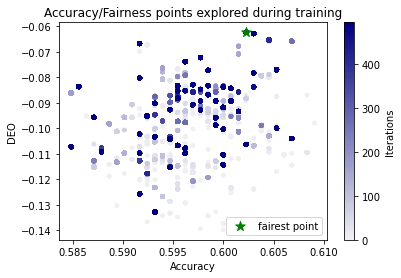

In [11]:
# to plot for all experiments
F = r['record']
A = r['record_acc']
my_cmap = sns.light_palette("Navy", as_cmap=True)

# to plot for just one experiment, replace with instead: (with the argmax found above)
# F = r['record'][arg_max][None]
# A = r['record_acc'][arg_max][None]

fair_df = pd.DataFrame(F).melt(value_name='-DEO', var_name='Iterations')
acc_df = pd.DataFrame(A).melt(value_name='Accuracy', var_name='nothing')
total_df = pd.concat([fair_df, acc_df], axis=1)

plt.scatter(x=total_df['Accuracy'], y=total_df['-DEO'], c=total_df["Iterations"], cmap=my_cmap, s=15)

fairest_point_idx_raveled = np.argmax(F)
fairest_point_idx = np.unravel_index(fairest_point_idx_raveled, shape=F.shape)
plt.colorbar(label='Iterations')
plt.scatter(A[fairest_point_idx], F[fairest_point_idx], marker='*', c='g', label='fairest point', s=100)
plt.legend()
plt.title('Accuracy/Fairness points explored during training')
plt.ylabel('DEO')
plt.xlabel('Accuracy')

In [13]:
g = np.load('results/GB_results.npz')

[Text(0.5, 0, 'Iterations'),
 Text(0, 0.5, 'DEO'),
 Text(0.5, 1.0, 'Evolution of fairness with iterations')]

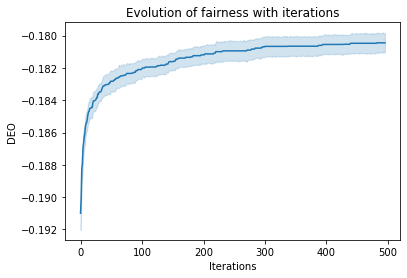

In [24]:
fig = sns.lineplot(data=pd.DataFrame(g['record']).melt(), x="variable", y="value")  # from https://github.com/mwaskom/seaborn/issues/1499
fig.set(xlabel='Iterations', ylabel='DEO', title='Evolution of fairness with iterations')

In [22]:
plt.savefig('img/GB_fairness.eps',format='eps')

<Figure size 432x288 with 0 Axes>

[Text(0.5, 0, 'Iterations'),
 Text(0, 0.5, 'Accuracy'),
 Text(0.5, 1.0, 'Evolution of accuracy with iterations')]

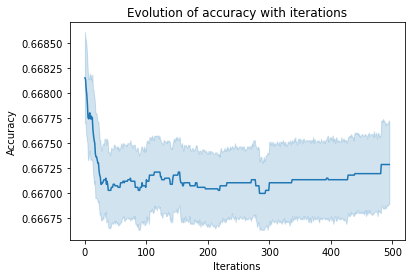

In [25]:
fig = sns.lineplot(data=pd.DataFrame(g['record_acc']).melt(), x="variable", y="value")  # from https://github.com/mwaskom/seaborn/issues/1499
fig.set(xlabel='Iterations', ylabel='Accuracy', title='Evolution of accuracy with iterations')

In [26]:
plt.savefig('img/GB_acc.eps',format='eps')

<Figure size 432x288 with 0 Axes>

[Text(0.5, 1.0, 'Accuracy/Fairness points explored during training')]

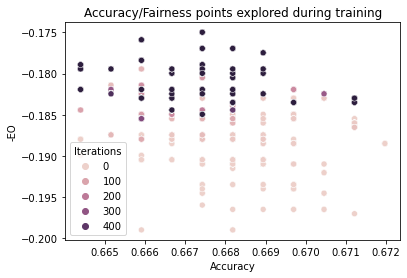

In [16]:
fair_df = pd.DataFrame(g['record']).melt(value_name='-EO', var_name='Iterations')
acc_df = pd.DataFrame(g['record_acc']).melt(value_name='Accuracy', var_name='nothing')
total_df = pd.concat([fair_df, acc_df], axis=1)

fig = sns.scatterplot(data=total_df, x="Accuracy", y='-EO', hue="Iterations")
fig.set(title="Accuracy/Fairness points explored during training")

In [17]:
# code to find which of the lines has the maximum number of points (so we can select it) (in case we want to plot just for 1 line)
a = g['record']
m = 0
for i in range(a.shape[0]):
  curr = len(np.unique(a[i]))
  if curr > m:
    m = curr
    arg_max = i

Text(0, 0.5, 'Accuracy')

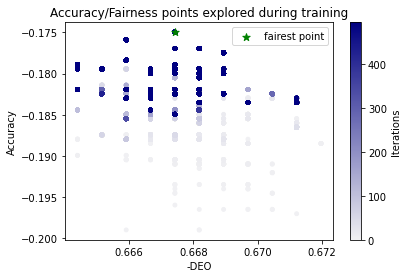

In [18]:
F = g['record']
A = g['record_acc']

# to plot for just one experiment, replace with instead: (with the argmax found above)
# F = r['record'][arg_max][None]
# A = r['record_acc'][arg_max][None]

my_cmap = sns.light_palette("Navy", as_cmap=True)

fair_df = pd.DataFrame(F).melt(value_name='-DEO', var_name='Iterations')
acc_df = pd.DataFrame(A).melt(value_name='Accuracy', var_name='nothing')
total_df = pd.concat([fair_df, acc_df], axis=1)

plt.scatter(x=total_df['Accuracy'], y=total_df['-DEO'], c=total_df["Iterations"], cmap=my_cmap, s=15)

fairest_point_idx_raveled = np.argmax(F)
fairest_point_idx = np.unravel_index(fairest_point_idx_raveled, shape=F.shape)
plt.colorbar(label='Iterations')
plt.scatter(A[fairest_point_idx], F[fairest_point_idx], marker='*', c='g', label='fairest point', s=60)
plt.legend()
plt.title('Accuracy/Fairness points explored during training')
plt.xlabel('-DEO')
plt.ylabel('Accuracy')

In [19]:
g['record'].shape

(50, 496)

# With just one slice

In [20]:
r = np.load('results/RF_123456_results.npz')

Text(0, 0.5, 'Accuracy')

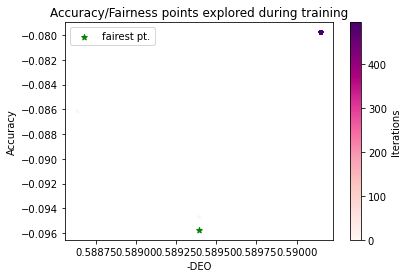

In [21]:
F = r['record']
A = r['record_acc']

# to plot for just one experiment, replace with instead: (with the argmax found above)
# F = r['record'][arg_max][None]
# A = r['record_acc'][arg_max][None]

fair_df = pd.DataFrame(F).melt(value_name='-DEO', var_name='Iterations')
acc_df = pd.DataFrame(A).melt(value_name='Accuracy', var_name='nothing')
total_df = pd.concat([fair_df, acc_df], axis=1)

plt.scatter(x=total_df['Accuracy'], y=total_df['-DEO'], c=total_df["Iterations"], cmap='RdPu', s=10)

fairest_point_idx_raveled = np.argmin(F)
fairest_point_idx = np.unravel_index(fairest_point_idx_raveled, shape=F.shape)
plt.colorbar(label='Iterations')
plt.scatter(A[fairest_point_idx], F[fairest_point_idx], marker='*', c='g', label='fairest pt.')
plt.legend()
plt.title('Accuracy/Fairness points explored during training')
plt.xlabel('-DEO')
plt.ylabel('Accuracy')